In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (2).csv


In [ ]:
df =pd.read_csv("/content/CarPrice_Assignment (1).csv")
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [ ]:
df.drop('car_ID', axis = 1, inplace = True)

In [ ]:
df.shape

(205, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [ ]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [ ]:
df['CarName'].str.split(' ').str.get(0).nunique()

28

In [ ]:
df['company']=df['CarName'].str.split(' ').str.get(0)

In [ ]:
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

In [ ]:
df.loc[df['company']=='vw','company']='volkswagen'
df.loc[df['company']=='porcshce','company']='porsche'
df.loc[df['company']=='nissan','company']='Nissan'
df.loc[df['company']=='maxda','company']='mazda'
df.loc[df['company']=='toyouta','company']='toyota'
df.loc[df['company']=='vokswagen','company']='volkswagen'

In [ ]:
df['company'].nunique()

22

In [ ]:
df['company'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

In [ ]:
df.drop('CarName',axis=1,inplace=True)

In [ ]:
df['company'].value_counts(normalize=True)*100

toyota         15.609756
Nissan          8.780488
mazda           8.292683
mitsubishi      6.341463
honda           6.341463
volkswagen      5.853659
subaru          5.853659
peugeot         5.365854
volvo           5.365854
dodge           4.390244
buick           3.902439
bmw             3.902439
audi            3.414634
plymouth        3.414634
saab            2.926829
porsche         2.439024
isuzu           1.951220
jaguar          1.463415
chevrolet       1.463415
alfa-romero     1.463415
renault         0.975610
mercury         0.487805
Name: company, dtype: float64

In [ ]:
def group(x):
  if 'renault' in x:
    return 'other'
  elif 'mercury'in x:
    return 'other'
  else:
    return x

In [ ]:
df['company']=df['company'].apply(lambda x:group(x))

In [ ]:
df['company'].value_counts(normalize=True)*100

toyota         15.609756
Nissan          8.780488
mazda           8.292683
honda           6.341463
mitsubishi      6.341463
subaru          5.853659
volkswagen      5.853659
peugeot         5.365854
volvo           5.365854
dodge           4.390244
buick           3.902439
bmw             3.902439
audi            3.414634
plymouth        3.414634
saab            2.926829
porsche         2.439024
isuzu           1.951220
alfa-romero     1.463415
jaguar          1.463415
chevrolet       1.463415
other           1.463415
Name: company, dtype: float64

In [ ]:
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
dtype: object

In [ ]:
cat_col = [df.dtypes.index[i] for i in range (len(df.dtypes)) if df.dtypes[i] == 'object']
cat_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [ ]:
num_col = [i for i in df.columns if i  not in cat_col ]
num_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
for i in cat_col:
  if i!='company':
    print('\n',df[i].value_counts(normalize=True)*100)
  else:
    pass


 gas       90.243902
diesel     9.756098
Name: fueltype, dtype: float64

 std      81.95122
turbo    18.04878
Name: aspiration, dtype: float64

 four    56.097561
two     43.902439
Name: doornumber, dtype: float64

 sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: carbody, dtype: float64

 fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: drivewheel, dtype: float64

 front    98.536585
rear      1.463415
Name: enginelocation, dtype: float64

 ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: enginetype, dtype: float64

 four      77.560976
six       11.707317
five       5.365854
eight      2.439024
two        1.951220
three      0.487805
twelve     0.487805
Name: cylindernumber, dtype: float64

 mpfi    45.853659
2bbl    32.195122
idi      9.756098
1bbl     5.365854
spdi     4.390244
4bbl     1.463415
mfi     

#1 Univariate Analysis

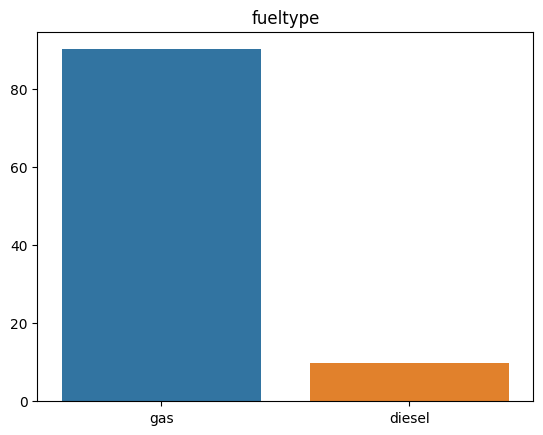

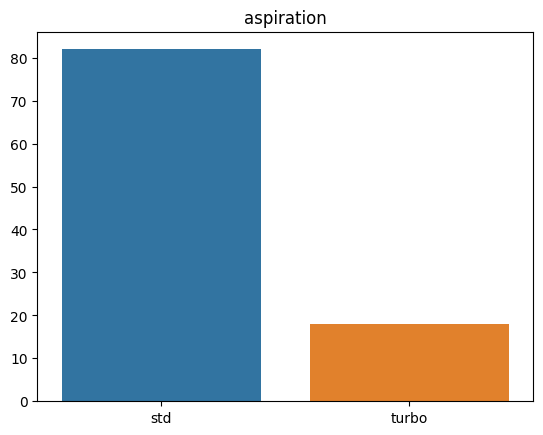

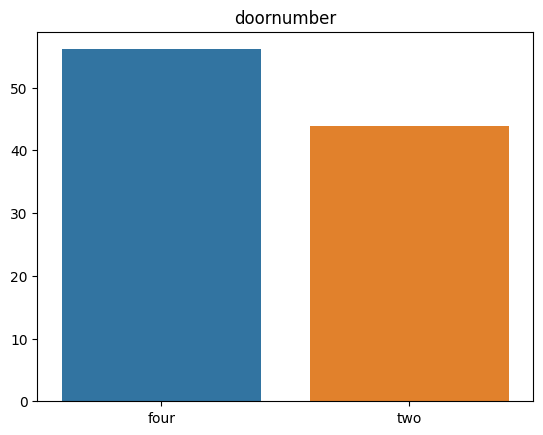

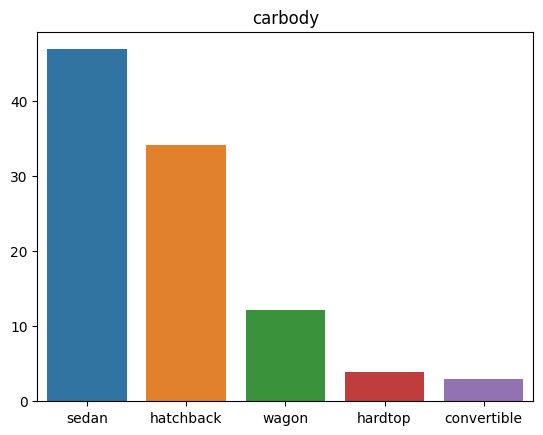

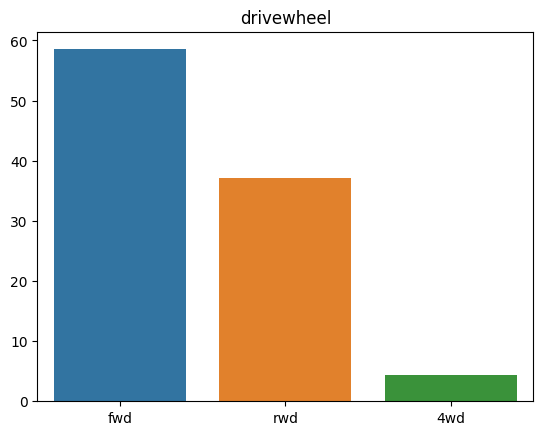

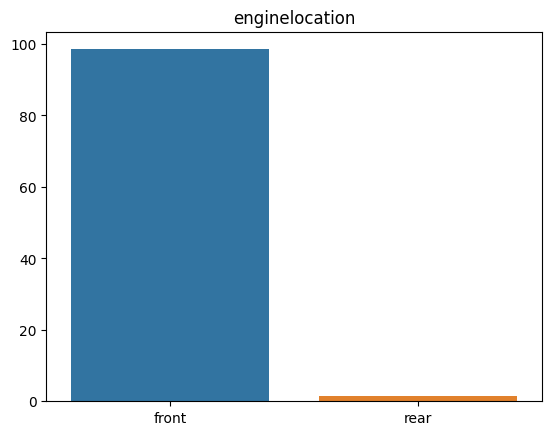

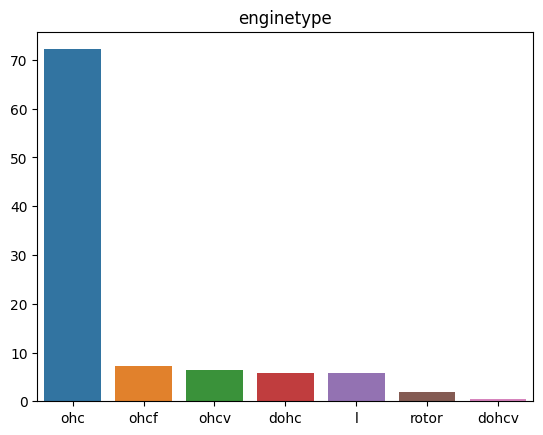

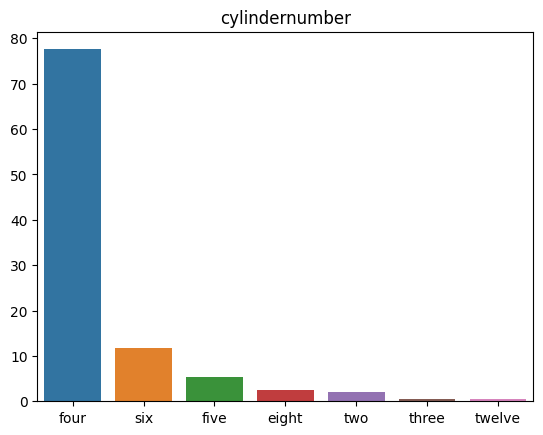

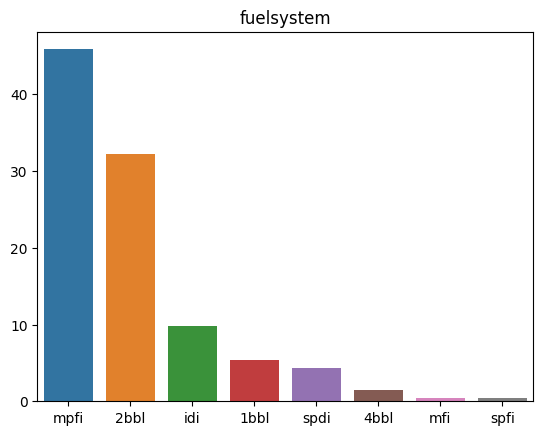

In [ ]:
for i in cat_col:
  if i!='company':
    fig,ax=plt.subplots()
    plt.title(i)
    sns.barplot(x=df[i].value_counts().index,y=(df[i].value_counts(normalize=True)*100).values)

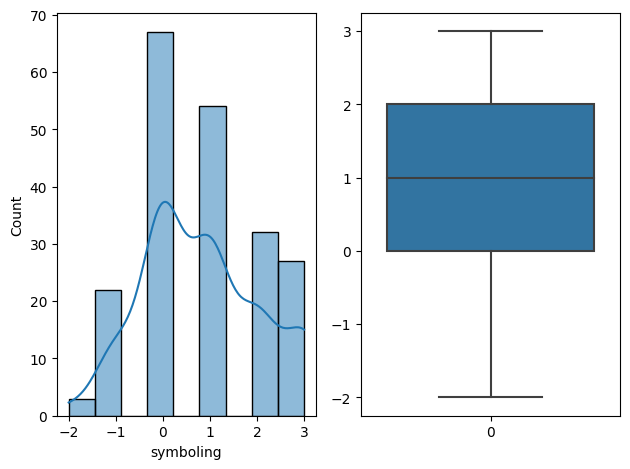

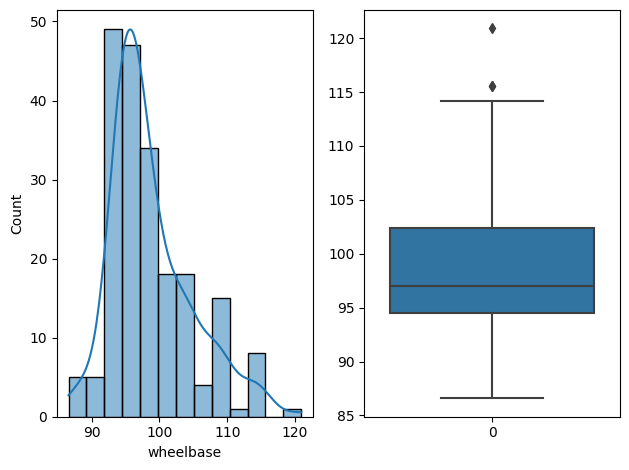

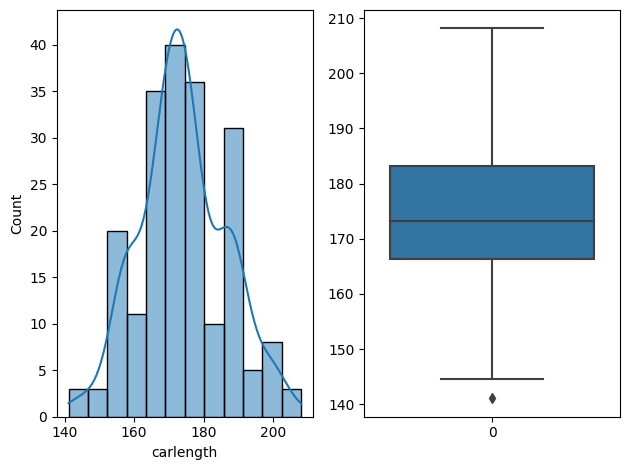

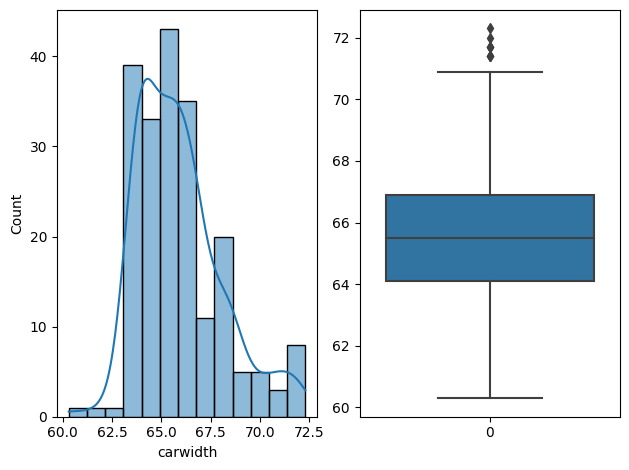

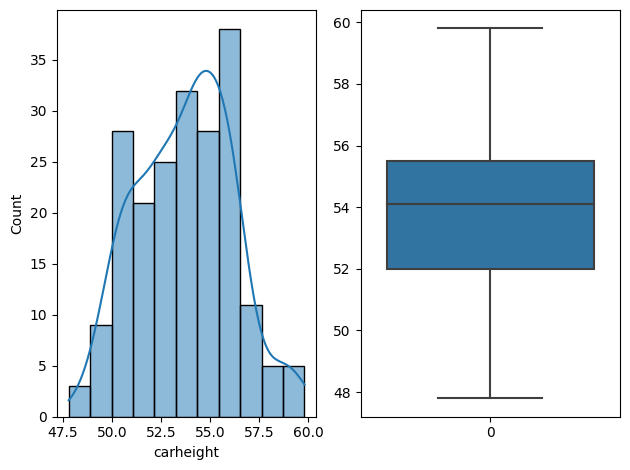

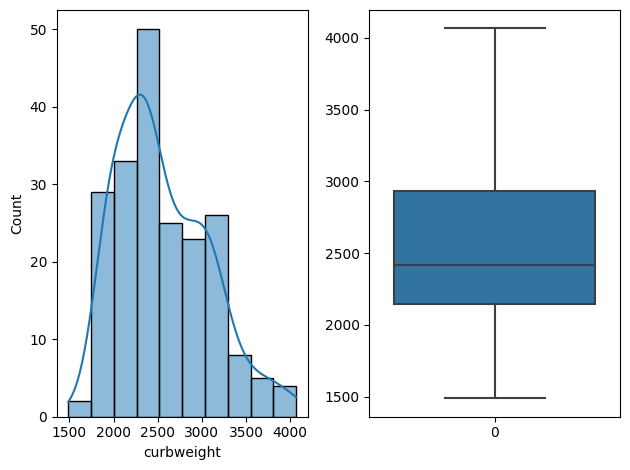

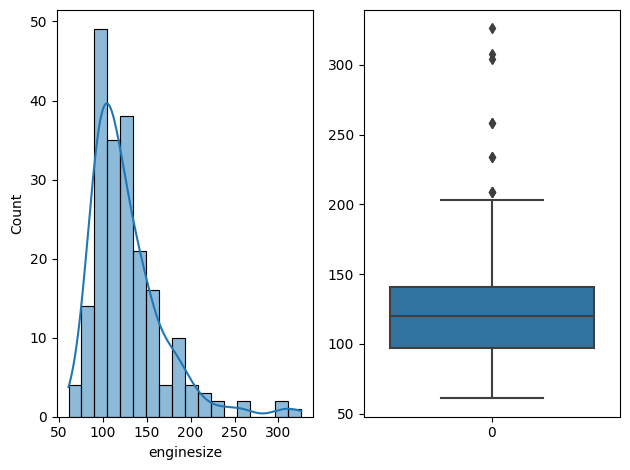

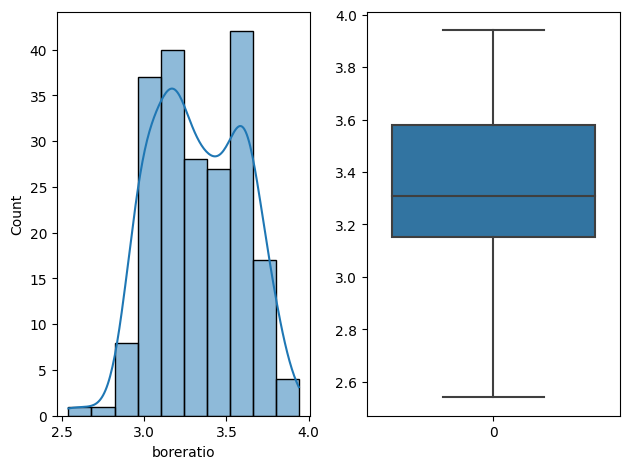

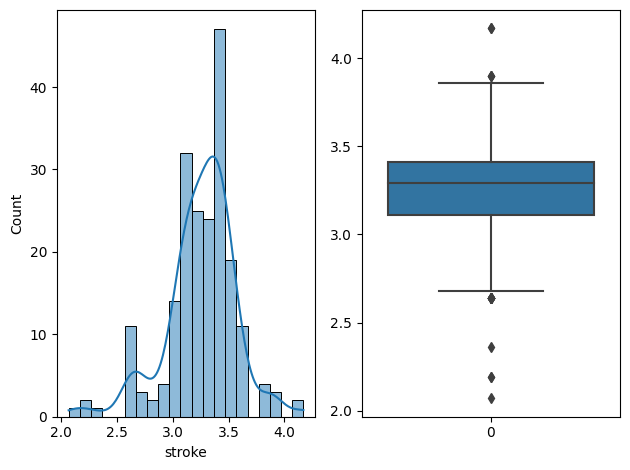

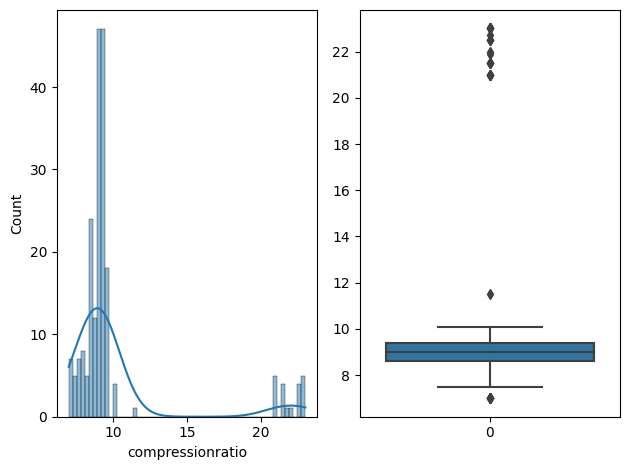

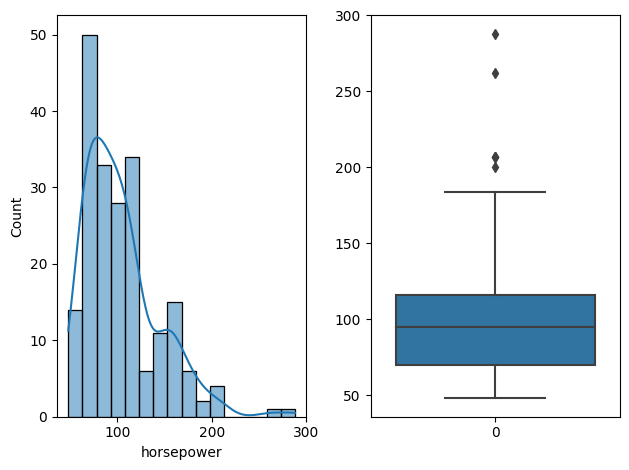

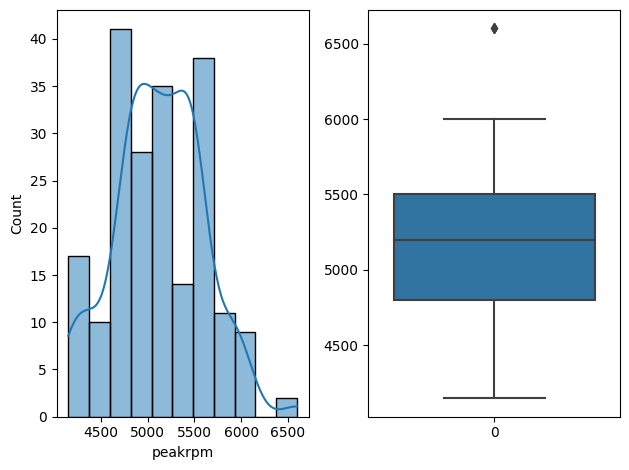

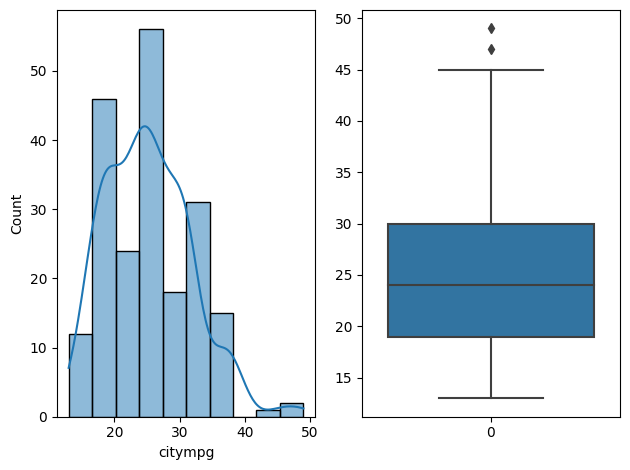

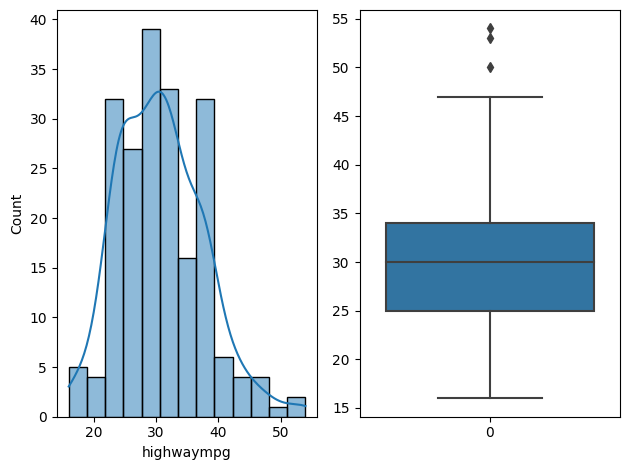

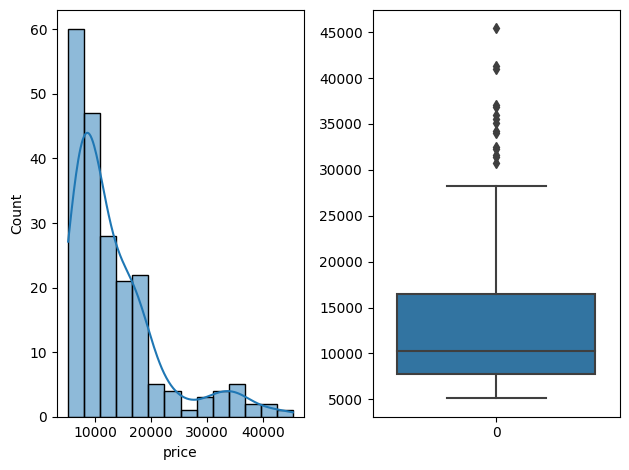

In [ ]:
for col in num_col:
  plt.subplot(1,2,1)
  sns.histplot(df[col],kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(df[col])
  plt.tight_layout()
  plt.show()

In [ ]:
df[df['compressionratio']>15]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
63,0,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,...,idi,3.39,3.39,22.7,64,4650,36,42,10795.0,mazda
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,idi,3.43,3.64,22.0,72,4200,31,39,18344.0,mazda
67,-1,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
68,-1,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick
69,0,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,idi,2.99,3.47,21.9,55,4800,45,50,7099.0,Nissan
108,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,idi,3.70,3.52,21.0,95,4150,28,33,13200.0,peugeot
110,0,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,...,idi,3.70,3.52,21.0,95,4150,25,25,13860.0,peugeot
112,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,idi,3.70,3.52,21.0,95,4150,28,33,16900.0,peugeot


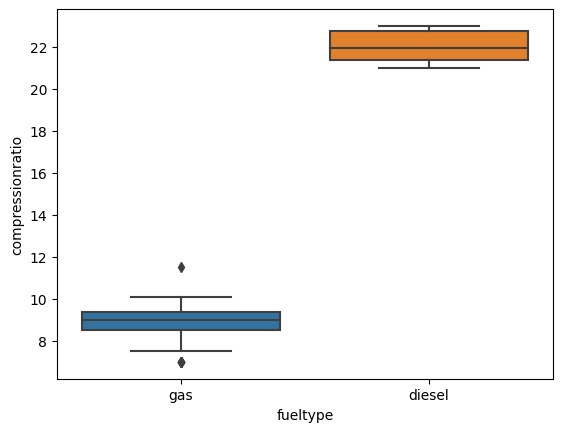

In [ ]:
sns.boxplot(x='fueltype',y='compressionratio',data=df);

In [ ]:
df['enginesize'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    201.20
0.96    209.00
0.97    231.00
0.98    256.08
0.99    302.16
1.00    326.00
Name: enginesize, dtype: float64

In [ ]:
df[df['enginesize']>250]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick
74,1,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,...,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,buick


In [ ]:
df['price'].quantile([0.95,0.96,0.97,0.98,0.99])

0.95    32472.40
0.96    34159.04
0.97    35490.72
0.98    36809.60
0.99    40802.72
Name: price, dtype: float64

In [ ]:
df[df['price']>30000]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
15,0,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
70,-1,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,-1,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,0,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


#2 Bivariate

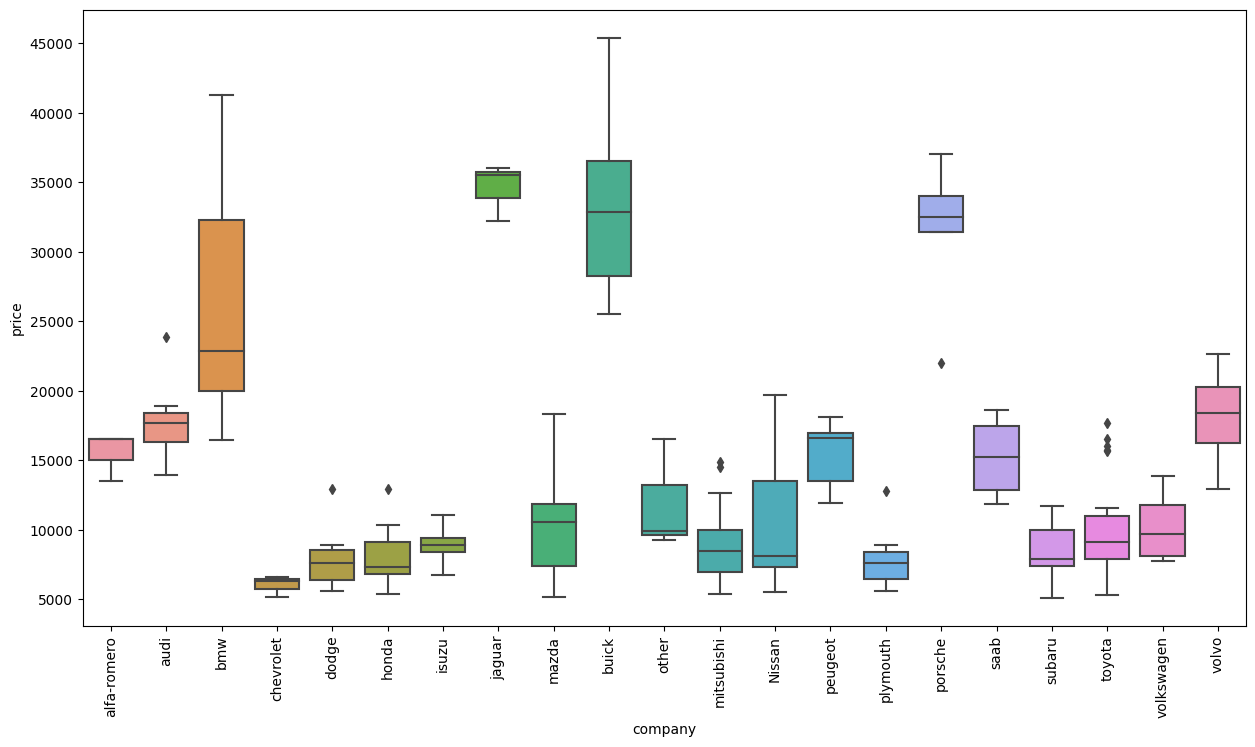

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='company',y='price',data=df);
plt.xticks(rotation='vertical');

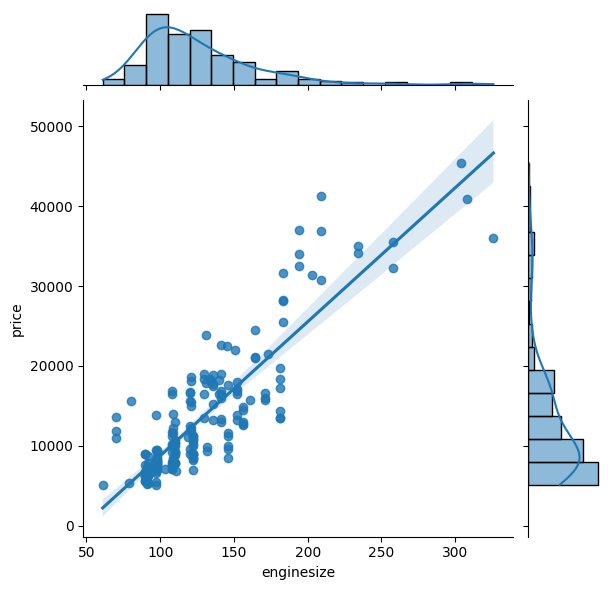

In [ ]:
sns.jointplot(x='enginesize',y='price',data=df,kind='reg');

In [ ]:
np.round(df['enginesize'].corr(df['price']),2)

0.87

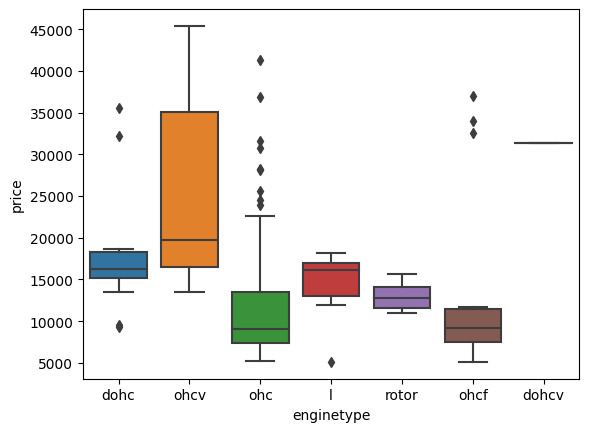

In [ ]:
sns.boxplot(x='enginetype',y='price',data=df);

In [ ]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

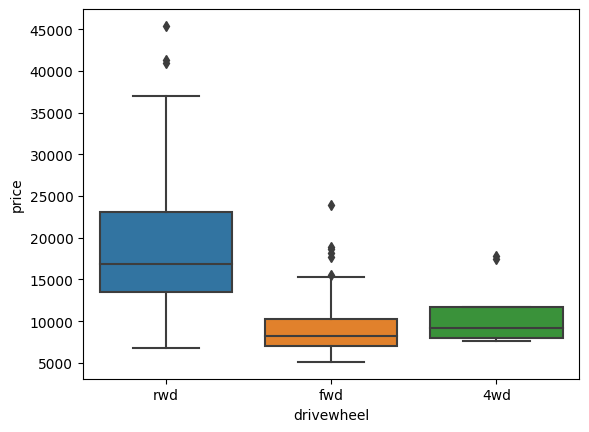

In [ ]:
sns.boxplot(x='drivewheel',y='price',data=df);

#3 Multivariate

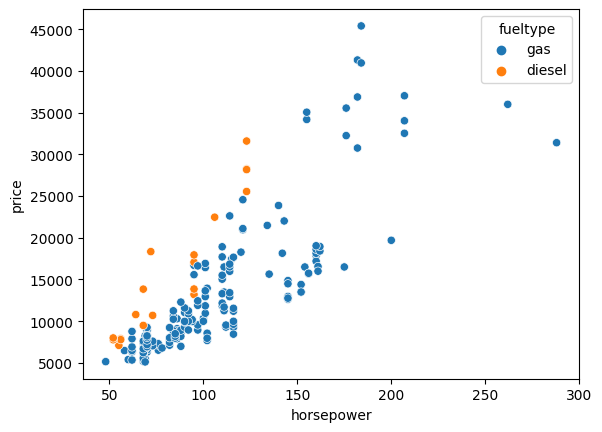

In [ ]:
sns.scatterplot(x='horsepower',y='price',hue='fueltype',data=df);

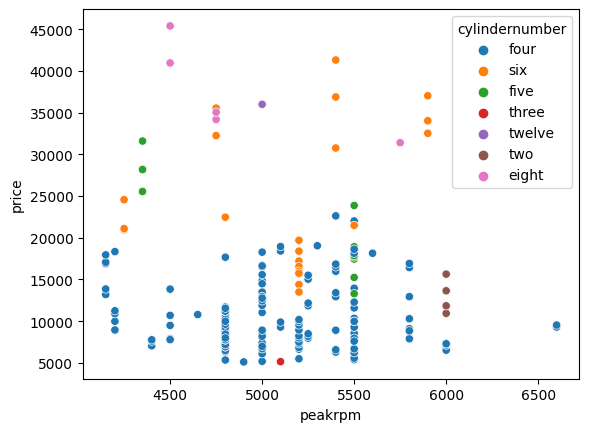

In [ ]:
sns.scatterplot(x='peakrpm',y='price',hue='cylindernumber',data=df);

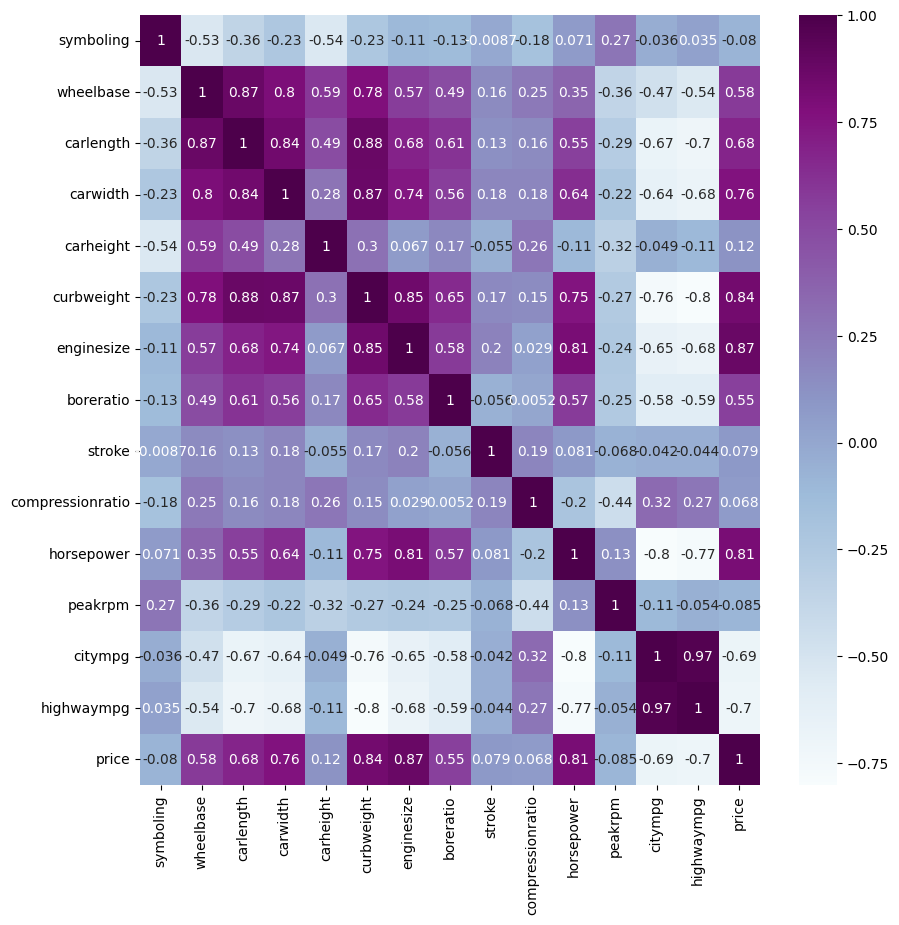

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='BuPu',annot=True);

In [ ]:
df.drop('highwaympg',axis=1,inplace=True)

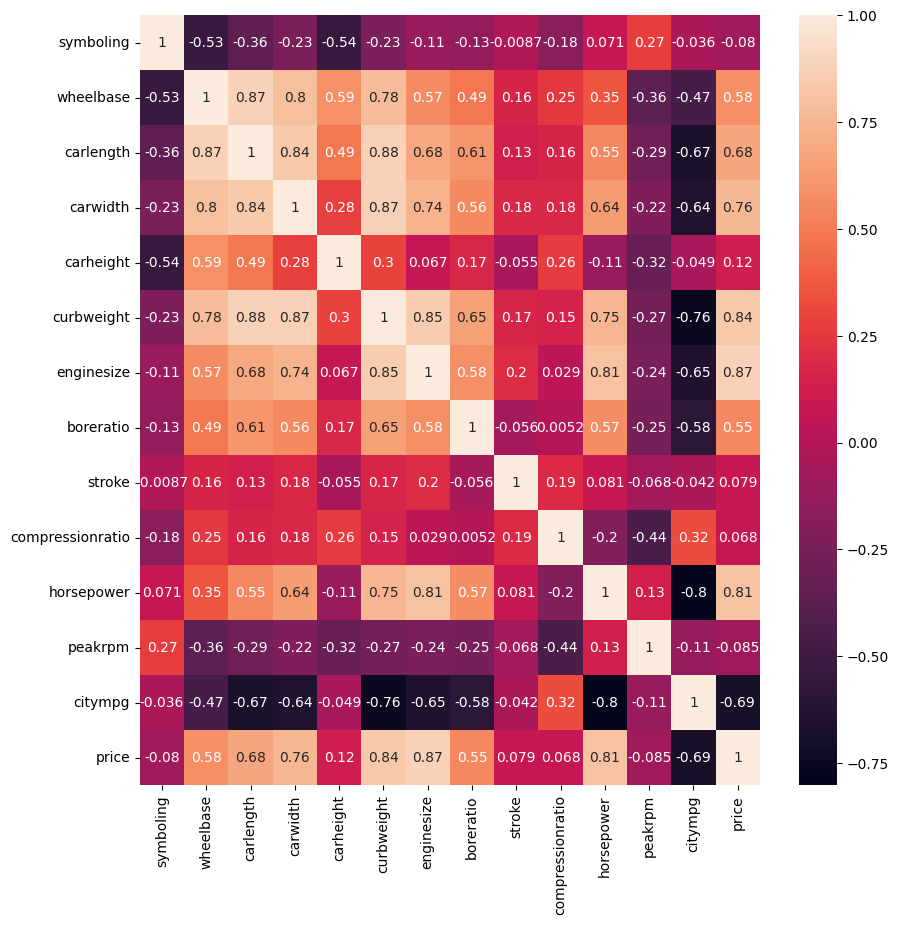

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='rocket',annot=True);

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=corr.index,y=corr.values,color='black');
plt.xticks(rotation='vertical');

NameError: ignored

<Figure size 1500x800 with 0 Axes>

In [ ]:
df.drop('wheelbase',axis=1,inplace=True)

In [ ]:
corr=df.corr()['price'].sort_values(ascending=False)[1:]
corr

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
Name: price, dtype: float64

In [ ]:
catdf=df[cat_col]

In [ ]:
dummies=pd.get_dummies(catdf,drop_first=True)

In [ ]:
df1=df.drop(list(catdf.columns),axis=1)

In [ ]:
df2=pd.concat([df1,dummies],axis=1)

In [ ]:
df2.columns

Index(['symboling', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_alfa-romero',
       'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df2.drop('price',axis=1)
y=df2['price']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
from sklearn import metrics
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
param={
    'criterion':['squared_error', 'absolute_error', 'poisson'],
    'max_depth':range(2,5),
    'max_features':['auto', 'sqrt', 'log2'],

}

In [ ]:
from sklearn.model_selection import GridSearchCV
search=GridSearchCV(rf,param,n_jobs=-1,cv=5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(2, 5),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [ ]:
search.best_params_

{'criterion': 'poisson', 'max_depth': 4, 'max_features': 'auto'}

In [ ]:
y_pred_gridtrain=search.predict(X_train)

In [ ]:
y_pred_gridtest=search.predict(X_test)

In [ ]:
n,p=X_train.shape[0],X_train.shape[1]

In [ ]:
r2tr=metrics.r2_score(y_train,y_pred_gridtrain)
print(f'R2Score on Training data is {r2tr}')
num=(1-r2tr)*(n-1)
den=n-p-1
ar2tr=1-(num/den)
print(f'Adjusted R2 score for training data is {ar2tr}')

R2Score on Training data is 0.9645094643853985
Adjusted R2 score for training data is 0.9407191053470393


In [ ]:
r2te=metrics.r2_score(y_test,y_pred_gridtest)
print(f'R2score on Testing data is {r2te}')
num=(1-r2te)*(n-1)
den=n-p-1
ar2te=1-(num/den)

print(f'Adjusted R2 score for testing data is {ar2te}')

R2score on Testing data is 0.931602966562846
Adjusted R2 score for testing data is 0.8857544056873912
